In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd


In [2]:
x1, sr1 = librosa.load('music/luckyyou_kinjaz.mp3')
x2, sr2 = librosa.load('music/luckyyou_autjoenoise.m4a')

In [3]:
print('Time of track1 in seconds: ' + str(x1.shape[0]/sr1))
print('Time of track2 in seconds: ' + str(x2.shape[0]/sr2))

Time of track1 in seconds: 122
Time of track2 in seconds: 53


In [4]:
#in seconds
MARGIN = 10
x1_snip = x1[:MARGIN * sr1]
x2_snip = x2[:MARGIN * sr2]
if sr1 == sr2:
    print('OK to proceed, sample rates are: ' + str(sr1))
else:
    print('Error, sample rates dont match')

OK to proceed, sample rates are: 22050


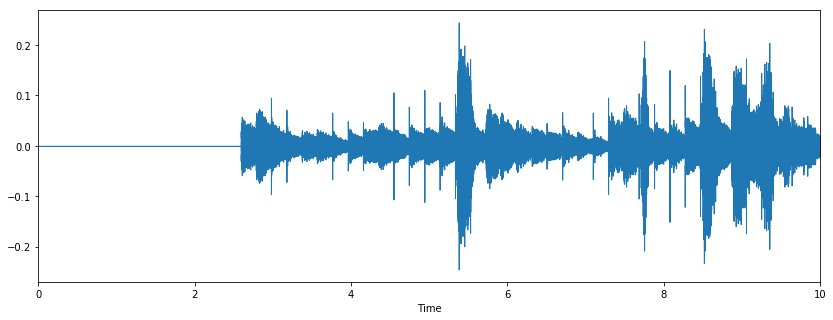

In [5]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(x1_snip, sr=sr1)

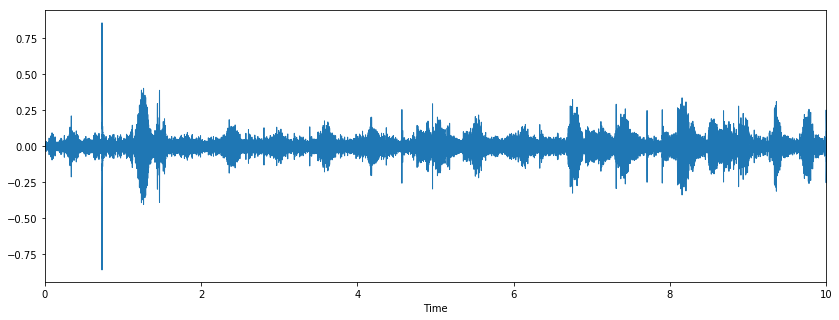

In [6]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(x2_snip, sr=sr2)

In [7]:
def array_correlation(array1, array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value. array1 and array2 do not have to be
    arrays of equal length.
    """
    ## YOUR CODE HERE
    ## Use np.correlate with "FULL". Check out the documentation page.
    correlated_array = np.correlate(array1, array2, 'full')
    end_index = len(array1)
    st_index = -len(array2) + 1
    indices = np.arange(st_index, end_index)    
    return (indices, correlated_array)

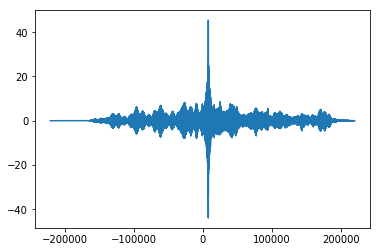

In [8]:
(offsets, corr) = array_correlation(x1_snip, x2_snip)
plt.plot(offsets, corr)

In [9]:
offset = offsets[np.argmax(corr)]
print("Offset is {} seconds".format(1.0 * offset / sr1))

Offset is 0.374421768707 seconds


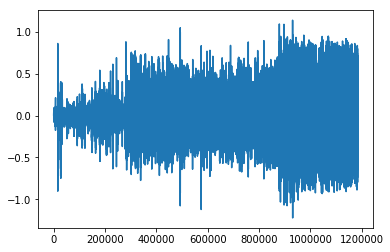

In [10]:
x1_crop = x1
x2_crop = x2
if offset > 0:
    x1_crop = x1[offset:]
else:
    x2_crop = x2[-offset:]
if len(x1_crop) < len(x2_crop):
    x2_crop = x2_crop[:len(x1_crop)]
else:
    x1_crop = x1_crop[:len(x2_crop)]

totalAudio = x1_crop + x2_crop
plt.plot(totalAudio)
ipd.Audio(totalAudio, rate=sr1)

151.99908088235293


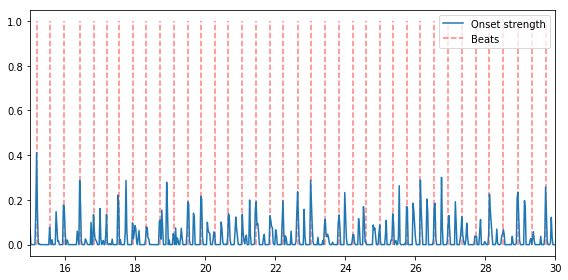

In [13]:
#plotting the tempo/beats of song

tempo, beats = librosa.beat.beat_track(y=x1, sr=sr1)

onset_env = librosa.onset.onset_strength(x1, sr=sr1, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr1)

hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=sr1, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 15-second window
plt.xlim(15, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()

print(tempo)